# Teams

## Shooting

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress, pearsonr


In [15]:
shooting = pd.read_csv('/Users/Ruffio/Documents/Prem/team/shooting_premier_league_stats.csv')

In [16]:
shooting

,Unnamed: 0,Squad,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,PK,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,1,Arsenal,84,589,194,32.9,15.50,5.11,0.14,0.42,3,71.9,69.1,0.12,12.1,11.9
1,2,Aston Villa,49,427,145,34.0,11.24,3.82,0.11,0.32,3,50.2,47.2,0.11,-1.2,-1.2
2,3,Bournemouth,37,358,126,35.2,9.42,3.32,0.10,0.29,0,38.6,38.6,0.11,-1.6,-1.6
3,4,Brentford,56,400,147,36.8,10.53,3.87,0.12,0.33,7,56.8,50.6,0.13,-0.8,-1.6
4,5,Brighton,68,607,219,36.1,15.97,5.76,0.10,0.28,6,73.3,68.9,0.12,-5.3,-6.9
5,6,Chelsea,37,481,151,31.4,12.66,3.97,0.07,0.23,3,49.5,47.2,0.10,-12.5,-13.2
6,7,Crystal Palace,38,423,133,31.4,11.13,3.50,0.09,0.28,1,39.3,36.8,0.09,-1.3,0.2
7,8,Everton,32,426,143,33.6,11.21,3.76,0.07,0.20,3,45.2,42.8,0.10,-13.2,-13.8
8,9,Fulham,52,420,137,32.6,11.05,3.61,0.11,0.34,5,46.2,39.1,0.10,5.8,7.9
9,10,Leeds United,45,459,141,30.7,12.08,3.71,0.10,0.31,1,47.4,45.0,0.10,-2.4,-1.0


In [17]:
shooting.describe().round(2)

,Unnamed: 0,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,PK,xG,npxG,npxG/Sh,G-xG,np:G-xG
count,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
mean,10.50,51.95,475.50,157.85,33.09,12.51,4.15,0.10,0.30,3.70,54.00,50.20,0.11,-2.05,-1.95
std,5.92,17.76,85.00,33.44,2.33,2.24,0.88,0.02,0.06,2.25,13.87,13.34,0.01,7.71,7.98
min,1.00,28.00,358.00,111.00,28.50,9.42,2.92,0.06,0.20,0.00,36.80,34.50,0.09,-13.20,-13.80
25%,5.75,37.00,412.75,133.00,31.40,10.86,3.50,0.09,0.26,2.75,43.72,38.98,0.10,-8.05,-8.88
50%,10.50,49.00,443.00,144.00,33.25,11.66,3.79,0.10,0.30,3.00,49.85,46.50,0.11,-1.65,-1.40
75%,15.25,65.00,571.00,188.00,34.75,15.03,4.94,0.11,0.33,5.25,68.75,65.82,0.12,-1.10,0.20
max,20.00,92.00,607.00,219.00,36.80,15.97,5.76,0.14,0.42,9.00,78.60,71.10,0.13,13.40,11.90


In [18]:
shooting = shooting.drop(columns=['Unnamed: 0'])
shooting.set_index(np.arange(1, len(shooting)+1))


,Squad,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,PK,xG,npxG,npxG/Sh,G-xG,np:G-xG
1,Arsenal,84,589,194,32.9,15.50,5.11,0.14,0.42,3,71.9,69.1,0.12,12.1,11.9
2,Aston Villa,49,427,145,34.0,11.24,3.82,0.11,0.32,3,50.2,47.2,0.11,-1.2,-1.2
3,Bournemouth,37,358,126,35.2,9.42,3.32,0.10,0.29,0,38.6,38.6,0.11,-1.6,-1.6
4,Brentford,56,400,147,36.8,10.53,3.87,0.12,0.33,7,56.8,50.6,0.13,-0.8,-1.6
5,Brighton,68,607,219,36.1,15.97,5.76,0.10,0.28,6,73.3,68.9,0.12,-5.3,-6.9
6,Chelsea,37,481,151,31.4,12.66,3.97,0.07,0.23,3,49.5,47.2,0.10,-12.5,-13.2
7,Crystal Palace,38,423,133,31.4,11.13,3.50,0.09,0.28,1,39.3,36.8,0.09,-1.3,0.2
8,Everton,32,426,143,33.6,11.21,3.76,0.07,0.20,3,45.2,42.8,0.10,-13.2,-13.8
9,Fulham,52,420,137,32.6,11.05,3.61,0.11,0.34,5,46.2,39.1,0.10,5.8,7.9
10,Leeds United,45,459,141,30.7,12.08,3.71,0.10,0.31,1,47.4,45.0,0.10,-2.4,-1.0


### Shots

In [19]:
shooting_sorted = shooting.sort_values('Sh', ascending=False).head(5).reset_index(drop=True)
shooting_sorted.index = shooting_sorted.index + 1
shooting_sorted[['Squad', 'Sh']] 


,Squad,Sh
1,Brighton,607
2,Liverpool,601
3,Manchester City,590
4,Manchester Utd,590
5,Arsenal,589


Brighton created the most shots in the Premier League last season.

### Shots on Target

In [20]:
SoT_sorted = shooting.sort_values('SoT', ascending=False).head(5).reset_index(drop=True)
SoT_sorted.index = SoT_sorted.index + 1
SoT_sorted[['Squad', 'SoT']]

,Squad,SoT
1,Brighton,219
2,Manchester Utd,206
3,Manchester City,205
4,Liverpool,203
5,Arsenal,194


Brighton also had the most shots on target last season.

### Expected Goals(xG)

In [21]:
shooting_xGsorted = shooting.sort_values('xG', ascending=False).set_index(np.arange(1, len(shooting)+1))
shooting_xGsorted[['Squad', 'xG']].head(5)

,Squad,xG
1,Manchester City,78.6
2,Brighton,73.3
3,Liverpool,72.6
4,Newcastle Utd,72.0
5,Arsenal,71.9


### Goals

In [22]:
top_5_gls = shooting.sort_values('Gls', ascending=False).head(5).reset_index(drop=True)
top_5_gls.index = top_5_gls.index + 1
top_5_gls[['Squad', 'Gls']]



,Squad,Gls
1,Manchester City,92
2,Arsenal,84
3,Liverpool,71
4,Tottenham,68
5,Brighton,68


### Overperformed xG

In [42]:
overperformed_xG = overperformed_xG.sort_values('Gls', ascending=False).reset_index(drop=True)
overperformed_xG.index = overperformed_xG.index + 1
overperformed_xG[['Squad', 'Gls', 'xG']]


,Squad,Gls,xG
1,Manchester City,92,78.6
2,Arsenal,84,71.9
3,Tottenham,68,57.1
4,Fulham,52,46.2


### Underperformed xG

In [44]:
underperformed_xG = shooting[shooting['Gls'] < shooting['xG']].sort_values('Gls', ascending=False).reset_index(drop=True)
underperformed_xG.index = underperformed_xG.index + 1
underperformed_xG[['Squad', 'Gls', 'xG']]

,Squad,Gls,xG
1,Liverpool,71,72.6
2,Brighton,68,73.3
3,Newcastle Utd,64,72.0
4,Brentford,56,56.8
5,Manchester Utd,56,67.7
6,Aston Villa,49,50.2
7,Leicester City,49,50.6
8,Leeds United,45,47.4
9,West Ham,41,49.2
10,Crystal Palace,38,39.3


### Goals per Shots on Target

In [25]:
goals_SoT_5 = shooting.sort_values('G/SoT', ascending=False).head(5).reset_index(drop=True)
goals_SoT_5.index = goals_SoT_5.index + 1
goals_SoT_5[['Squad', 'G/SoT', 'Gls']]

,Squad,G/SoT,Gls
1,Arsenal,0.42,84
2,Manchester City,0.40,92
3,Fulham,0.34,52
4,Tottenham,0.34,68
5,Liverpool,0.34,71


In [26]:
goals_SoT = shooting.sort_values('G/SoT', ascending=False).reset_index(drop=True)
goals_SoT.index = goals_SoT.index + 1
goals_SoT[['Squad', 'G/SoT', 'Gls']]

,Squad,G/SoT,Gls
1,Arsenal,0.42,84
2,Manchester City,0.40,92
3,Fulham,0.34,52
4,Tottenham,0.34,68
5,Liverpool,0.34,71
6,Brentford,0.33,56
7,Newcastle Utd,0.32,64
8,Aston Villa,0.32,49
9,Leicester City,0.32,49
10,Leeds United,0.31,45


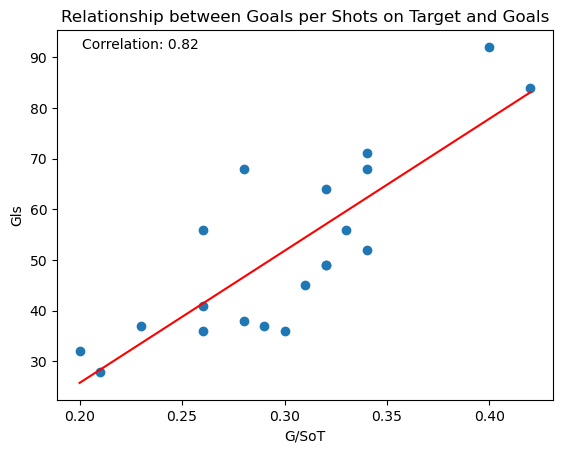

In [27]:
# Calculate line of best fit
slope, intercept, r_value, p_value, std_err = linregress(goals_SoT['G/SoT'], goals_SoT['Gls'])
line = slope * goals_SoT['G/SoT'] + intercept

# Plot scatter plot with line of best fit
plt.scatter(goals_SoT['G/SoT'], goals_SoT['Gls'])
plt.plot(goals_SoT['G/SoT'], line, color='red', label='Line of Best Fit')

# Add labels and title
plt.xlabel('G/SoT')
plt.ylabel('Gls')
plt.title('Relationship between Goals per Shots on Target and Goals')

# Calculate Pearson correlation coefficient
correlation, _ = pearsonr(goals_SoT['G/SoT'], goals_SoT['Gls'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

# Show the plot
plt.show()


### Goals per Shots

In [28]:
goals_Shot_5 = shooting.sort_values('G/Sh', ascending=False).head(5).reset_index(drop=True)
goals_Shot_5.index = goals_Shot_5.index + 1
goals_Shot_5[['Squad', 'G/Sh', 'Gls']]

,Squad,G/Sh,Gls
1,Arsenal,0.14,84
2,Manchester City,0.14,92
3,Tottenham,0.12,68
4,Brentford,0.12,56
5,Fulham,0.11,52


In [29]:
goals_SoT = shooting.sort_values('G/Sh', ascending=False).reset_index(drop=True)
goals_SoT.index = goals_SoT.index + 1
goals_SoT[['Squad', 'G/Sh', 'Gls']]

,Squad,G/Sh,Gls
1,Arsenal,0.14,84
2,Manchester City,0.14,92
3,Tottenham,0.12,68
4,Brentford,0.12,56
5,Fulham,0.11,52
6,Liverpool,0.11,71
7,Aston Villa,0.11,49
8,Leicester City,0.11,49
9,Leeds United,0.10,45
10,Brighton,0.10,68


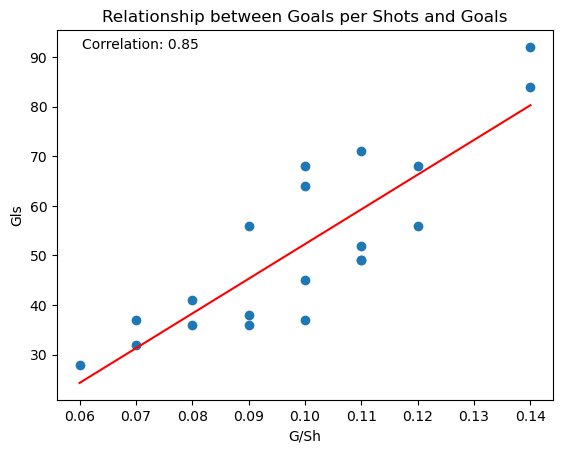

In [30]:
# Calculate line of best fit
slope, intercept, r_value, p_value, std_err = linregress(goals_SoT['G/Sh'], goals_SoT['Gls'])
line = slope * goals_SoT['G/Sh'] + intercept

# Plot scatter plot with line of best fit
plt.scatter(goals_SoT['G/Sh'], goals_SoT['Gls'])
plt.plot(goals_SoT['G/Sh'], line, color='red', label='Line of Best Fit')

# Add labels and title
plt.xlabel('G/Sh')
plt.ylabel('Gls')
plt.title('Relationship between Goals per Shots and Goals')

# Calculate Pearson correlation coefficient
correlation, _ = pearsonr(goals_SoT['G/Sh'], goals_SoT['Gls'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

# Show the plot
plt.show()

## Possesion

In [31]:
possession = pd.read_csv('/Users/Ruffio/Documents/Prem/team/possession_premier_league_stats.csv')
possession = possession.drop(columns=['Unnamed: 0'])
possession.index = possession.index + 1
possession 

,Squad,Poss,90s,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Att,...,Tkld,Tkld%,Carries,PrgDist,PrgC,1/3,CPA,Mis,Dis,PrgR
1,Arsenal,59.3,38.0,25909,1994,6632,11452,8015,1296,751,...,290,38.6,15924,44202,824,583,281,526,378,2024
2,Aston Villa,49.3,38.0,21501,2783,7912,9077,4706,746,681,...,279,41.0,12294,33156,637,434,174,565,371,1227
3,Bournemouth,40.4,38.0,19950,2934,8004,7933,4256,699,735,...,344,46.8,10336,27419,504,388,144,589,367,986
4,Brentford,43.8,38.0,19750,2632,7290,7802,4835,827,597,...,248,41.5,10408,23987,392,299,102,520,335,1121
5,Brighton,60.2,38.0,26728,2471,7844,12213,6873,1102,726,...,279,38.4,16331,43965,809,547,250,558,324,1828
6,Chelsea,58.7,38.0,27166,2564,8461,12057,6850,958,838,...,352,42.0,16538,43596,829,622,216,568,381,1729
7,Crystal Palace,46.3,38.0,21713,2580,7668,9275,4991,766,784,...,314,40.1,11687,30015,556,393,206,643,457,1238
8,Everton,42.8,38.0,20233,2527,7219,8417,4830,742,669,...,296,44.2,10479,27858,500,391,137,605,300,1042
9,Fulham,48.8,38.0,22162,2563,7462,9521,5416,758,599,...,239,39.9,12250,35319,662,472,124,535,379,1316
10,Leeds United,47.0,38.0,21642,2125,6971,9290,5587,796,688,...,328,47.7,11342,27062,555,379,146,602,421,1418


### Possession Percentage

In [32]:
poss_pct = possession.sort_values(by='Poss', ascending=False)
poss_pct.reset_index(drop=True, inplace=True)
poss_pct.index = poss_pct.index + 1
poss_pct.loc[:5, ['Squad', 'Poss']]


,Squad,Poss
1,Manchester City,64.7
2,Liverpool,60.8
3,Brighton,60.2
4,Arsenal,59.3
5,Chelsea,58.7


### Touches in Attacking Third

In [33]:
att3rd_possesion = possession.sort_values(by='Att 3rd', ascending=False).reset_index(drop=True)
att3rd_possesion.index = att3rd_possesion.index + 1
att3rd_possesion.loc[:5, ['Squad', 'Att 3rd']]


,Squad,Att 3rd
1,Manchester City,8301
2,Arsenal,8015
3,Liverpool,7149
4,Brighton,6873
5,Chelsea,6850


### Touches in Defensive Third

In [34]:
def3rd_possession = possession.sort_values(by='Def 3rd', ascending=False).reset_index(drop=True)
def3rd_possession.index = def3rd_possession.index + 1
def3rd_possession.loc[:5, ['Squad', 'Def 3rd']]

,Squad,Def 3rd
1,Tottenham,8571
2,Wolves,8544
3,Chelsea,8461
4,Leicester City,8408
5,Liverpool,8119


### Progressive Carries

In [35]:
progressive_carries = possession.sort_values(by='PrgC', ascending=False).reset_index(drop=True)
progressive_carries.index = progressive_carries.index + 1
progressive_carries.loc[:5, ['Squad', 'PrgC']]

,Squad,PrgC
1,Manchester City,988
2,Chelsea,829
3,Arsenal,824
4,Brighton,809
5,Liverpool,719


# Players